# Análisis estadístico

## Introducción a las pruebas de hipótesis

Supongamos que se nos da una moneda y al tirarla 30 veces obtenemos 22 soles y 8 águilas ¿La moneda es justa?

- Hipótesis nula: El resultado observado se debe al azar
- Hiótesis alternativa: La negación de la hipótesis nula
    


## Método alternativo: simulación

In [1]:
import numpy as np
import numba
from scipy import stats
import matplotlib.pyplot as plt
import itertools

In [2]:
@numba.jit
def calcular_p(n, p, repeticiones=1_000_000):
    M = 0
    for i in range(10000):
        k = np.sum(np.random.random(size=n) < p)
        M += int((k > 21) or (k < 8)) 
    return M/repeticiones

n, p = 30, 0.5
calcular_p(n, p)

9.5e-05

In [3]:
calcular_p(30, .5)

0.000108

In [4]:
X = [1.1, 3.0, 2.8, 1.9, 2.5, 2.6]
Y = [8.1, 3.5, 5.4, 2.4, 3.0, 4.1]

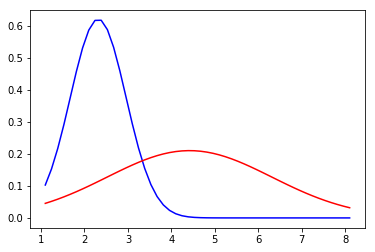

In [5]:
def comparar_normales(X, Y):
    N_1 = stats.norm(np.mean(X), np.std(X))
    N_2 = stats.norm(np.mean(Y), np.std(Y))

    a,b = min(X+Y), max(X+Y)
    dominio = np.linspace(a, b)
    plt.plot(dominio, N_1.pdf(dominio), color='blue')
    plt.plot(dominio, N_2.pdf(dominio), color='red')
    
comparar_normales(X,Y)

In [6]:
def comparar_normales(X, Y):
    N_1 = stats.norm(np.mean(X), np.std(X))
    N_2 = stats.norm(np.mean(Y), np.std(Y))

    a,b = min(itertools.chain((X+Y))), max(itertools.chain((X+Y)))
    dominio = np.linspace(a, b)
    plt.plot(dominio, N_1.pdf(dominio), color='blue')
    plt.plot(dominio, N_2.pdf(dominio), color='red')

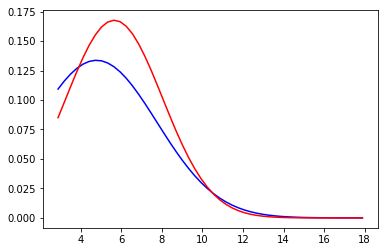

In [7]:
X = np.random.normal(loc = 5, scale = 3, size=30)
Y = np.random.normal(loc = 6, scale = 3, size=30)
comparar_normales(X, Y)

In [8]:
X

array([-1.74725717e+00,  9.71809868e+00,  4.56151043e+00,  5.34765344e+00,
        1.82701149e+00,  7.82513208e+00,  3.77089557e+00,  1.70204531e+00,
        4.70293899e+00,  9.15724611e+00,  3.27232131e+00,  4.92995035e-02,
        6.56029179e+00,  6.67595632e+00, -1.32432188e-03,  9.18387691e+00,
        7.44203774e+00,  2.12259862e+00,  7.43574539e+00,  3.79910005e+00,
        6.25498524e+00,  3.93355039e+00,  9.05441118e+00,  5.43071221e+00,
        7.30680544e-01,  6.70155127e+00,  3.29980660e+00,  4.33328972e+00,
        7.52485764e+00,  2.61847765e+00])

In [9]:
Y

array([ 7.69067335,  8.17109489,  9.6232107 ,  4.44375221,  1.05428363,
        4.25887762, 10.51645821,  6.3569736 ,  5.36588625,  0.35504057,
        8.59421232,  3.5219217 ,  7.55326625,  7.64896028,  4.64980392,
        4.57067474,  5.66922693,  3.33178468,  7.85638811,  8.0576713 ,
        5.11142464,  6.66598884,  2.308162  ,  2.834069  ,  5.55271166,
        4.07316557,  4.96504541,  5.83341872,  7.69285457,  5.28445114])

In [10]:
Z = np.concatenate([X, Y])
Z

array([-1.74725717e+00,  9.71809868e+00,  4.56151043e+00,  5.34765344e+00,
        1.82701149e+00,  7.82513208e+00,  3.77089557e+00,  1.70204531e+00,
        4.70293899e+00,  9.15724611e+00,  3.27232131e+00,  4.92995035e-02,
        6.56029179e+00,  6.67595632e+00, -1.32432188e-03,  9.18387691e+00,
        7.44203774e+00,  2.12259862e+00,  7.43574539e+00,  3.79910005e+00,
        6.25498524e+00,  3.93355039e+00,  9.05441118e+00,  5.43071221e+00,
        7.30680544e-01,  6.70155127e+00,  3.29980660e+00,  4.33328972e+00,
        7.52485764e+00,  2.61847765e+00,  7.69067335e+00,  8.17109489e+00,
        9.62321070e+00,  4.44375221e+00,  1.05428363e+00,  4.25887762e+00,
        1.05164582e+01,  6.35697360e+00,  5.36588625e+00,  3.55040569e-01,
        8.59421232e+00,  3.52192170e+00,  7.55326625e+00,  7.64896028e+00,
        4.64980392e+00,  4.57067474e+00,  5.66922693e+00,  3.33178468e+00,
        7.85638811e+00,  8.05767130e+00,  5.11142464e+00,  6.66598884e+00,
        2.30816200e+00,  

In [11]:
np.random.shuffle(Z)
Z

array([ 7.69067335e+00,  9.62321070e+00,  7.52485764e+00,  3.79910005e+00,
        5.36588625e+00,  7.82513208e+00,  5.43071221e+00,  4.70293899e+00,
        7.69285457e+00,  5.11142464e+00,  7.43574539e+00, -1.32432188e-03,
        8.59421232e+00,  3.77089557e+00,  3.52192170e+00,  4.92995035e-02,
        5.83341872e+00,  5.55271166e+00,  6.35697360e+00,  3.29980660e+00,
        4.07316557e+00, -1.74725717e+00,  7.30680544e-01,  4.56151043e+00,
        8.05767130e+00,  2.61847765e+00,  9.71809868e+00,  1.05428363e+00,
        5.34765344e+00,  9.18387691e+00,  4.44375221e+00,  1.70204531e+00,
        3.27232131e+00,  5.66922693e+00,  4.64980392e+00,  7.85638811e+00,
        1.05164582e+01,  4.96504541e+00,  6.25498524e+00,  3.55040569e-01,
        3.93355039e+00,  8.17109489e+00,  2.83406900e+00,  6.56029179e+00,
        4.25887762e+00,  6.67595632e+00,  6.70155127e+00,  2.30816200e+00,
        7.64896028e+00,  4.33328972e+00,  7.55326625e+00,  7.44203774e+00,
        2.12259862e+00,  

In [12]:
@numba.jit
def prueba_diferencia_medias(X, Y, repeticiones=1_000_000):
    Z = np.concatenate([X, Y])
    diferencias=[]
    diferencias_obs = np.mean(X) - np.mean(Y)
    for i in range(repeticiones):
        np.random.shuffle(Z)
        X_simulado = Z[:len(X)]
        Y_simulado = Z[len(X):]
        diferencias.append(np.mean(X_simulado) - np.mean(Y_simulado))
    plt.hist(diferencias)
    plt.axvline(diferencias_obs,color='red')
    #return np.sum(np.abs(np.array(diferencias) - diferencias_obs))/repeticiones
    #return np.sum(np.array(diferencias) >= diferencias_obs)/repeticiones    
    return np.sum(np.abs(np.array(diferencias)) <= np.abs(diferencias_obs))/repeticiones

0.965981

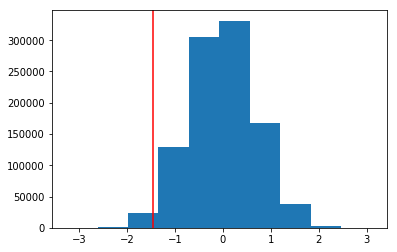

In [13]:
X = np.random.normal(loc=8, scale=3, size=30)
Y = np.random.normal(loc=9, scale=3, size=40)

prueba_diferencia_medias(X,Y)

In [14]:
N = np.random.randint(1, 50)
xbar = [None]*100000
for i in range(100000):
    sample = N[np.random.randint(len(N),size=len(N))]
    xbar[i] = np.mean(sample)
    
plt.hist(xbar, bin=30)

TypeError: object of type 'int' has no len()

In [ ]:
conf = 95
a = (100 - conf)/2
b = 100 - a
np.percentile(xbar, [a,b])

In [ ]:
np.mean(N)